## Observations and Insights 

Mouse weight correlated strongly (0.95) with average tumor volume for capomulin.
both capomulin and ramicane appear to be the equally effective.
The study had a near identical number of male and female mice.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")
# Display the data table for preview
combined_df = pd.DataFrame(combined)
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique = combined_df["Mouse ID"].nunique()
total= combined_df["Mouse ID"].count()
print(f"There are {unique} unique mice and a total of {total} tests conducted on the mice")


There are 249 unique mice and a total of 1893 tests conducted on the mice


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated = combined_df[combined_df.duplicated(("Mouse ID","Timepoint"),keep='last')]
duplicated


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
allduplicated = combined_df.loc[combined_df["Mouse ID"]== "g989"]
allduplicated


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = pd.DataFrame(combined_df.drop_duplicates(("Mouse ID","Timepoint"),keep="last").reset_index(drop=True))
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
unique_mouse = pd.DataFrame(cleaned_df.drop_duplicates(('Mouse ID'),keep='last').reset_index(drop=True))
unique_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


# Summary Statistics

In [7]:
# Checking the number of mice in the clean DataFrame.
unique2 = cleaned_df["Mouse ID"].nunique()
total2= cleaned_df["Mouse ID"].count()
print(f"After cleaning the data there are {unique2} unique mice and a total of {total2} tests conducted on the mice")


After cleaning the data there are 249 unique mice and a total of 1888 tests conducted on the mice


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = cleaned_df.groupby(cleaned_df["Drug Regimen"])
sem = summary["Tumor Volume (mm3)"].sem()
mean = summary["Tumor Volume (mm3)"].mean()
median = summary["Tumor Volume (mm3)"].median()
var = summary["Tumor Volume (mm3)"].var()
std = summary["Tumor Volume (mm3)"].std()
summarydata = pd.DataFrame({"Mean":mean,
                            "Median":median,
                            "Variance":var, 
                            "Standard Deviation": std, 
                            "SEM":sem})
summarydata
# This method is the most straighforward, creating multiple series and putting them all together at the end.


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
cleaned_groupby = cleaned_df.groupby('Drug Regimen')
summary_stats_regimen = cleaned_groupby.agg({'Tumor Volume (mm3)': [np.mean, np.median, np.var, np.std, st.sem]})
summary_stats_regimen

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Mice per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

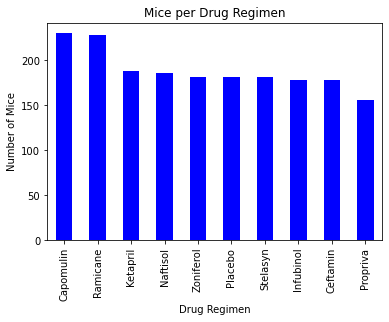

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

bar_data = cleaned_df['Drug Regimen'].value_counts()

bar_data.plot(kind="bar", title="Mice per Drug Regimen", xlabel="Drug Regimen", ylabel="Number of Mice", color="b")


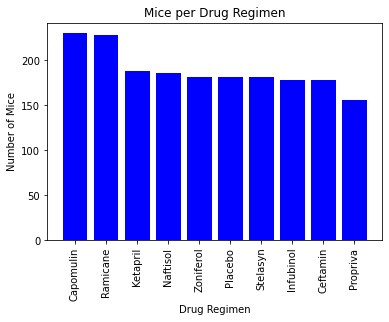

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot
x_axis = np.arange(len(bar_data))
plt.bar(x_axis, bar_data, color='b')
plt.xticks(x_axis, bar_data.index, rotation="vertical")
plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

<AxesSubplot:title={'center':'Sex'}>

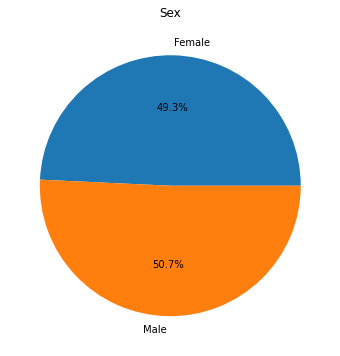

In [12]:
gender_group = cleaned_df.groupby('Sex')

# Create a dataframe counting the number of data points for each gender
#pie_data = pd.DataFrame(gender_group['Sex'].count())

# View the groupby datafram
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_data = gender_group['Mouse ID'].count()
pie_data.plot.pie(ylabel="", title='Sex', figsize=(8,6), autopct='%1.1f%%')


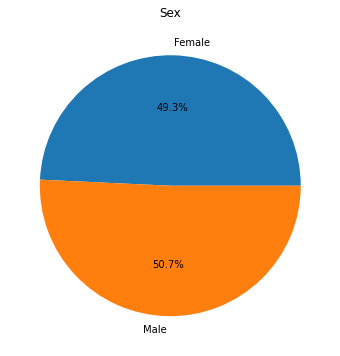

In [13]:
plt.figure(figsize=(8,6))
plt.pie(pie_data, autopct='%1.1f%%', labels=pie_data.index)
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs = unique_mouse.groupby(["Drug Regimen", "Mouse ID"])
# Start by getting the last (greatest) timepoint for each mouse
four_drugs =four_drugs.last()['Tumor Volume (mm3)'].to_frame().reset_index()
four_drugs.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']


final_tumor = four_drugs.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list).to_frame().reindex(regimens)
final_tumor
 
quartiles = four_drugs.groupby('Drug Regimen').quantile([.25,.5,.75])
regimens_quartiles = quartiles.take([0, 1, 2, 3, 4, 5, 6, 7, 8, 21, 22, 23], axis=0) 
capomulin = regimens_quartiles.iloc[:3, :]
ceftamin = regimens_quartiles.iloc[3:6, :]
infubinol = regimens_quartiles.iloc[6:9, :]
ramicane = regimens_quartiles.iloc[6:9, :]
regimens_quartiles_dict = dict(zip(regimens, [capomulin, ceftamin, infubinol, ramicane]))
outlier_list = list()
for regimen, regimens_quartile_df in regimens_quartiles_dict.items():
    print(regimen.upper())
    print('-' * len(regimen))
    lowerq = regimens_quartile_df['Tumor Volume (mm3)'][0]
    middleq = regimens_quartile_df['Tumor Volume (mm3)'][1]
    upperq = regimens_quartile_df['Tumor Volume (mm3)'][2]
    iqr = upperq-lowerq

    print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
    print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
    print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
    print(f"The the median of Tumor Volume (mm3) is: {middleq} ")

    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.\n")
    
    outliers = four_drugs.loc[(four_drugs['Drug Regimen'] == regimen) & ((four_drugs['Tumor Volume (mm3)'] < lower_bound) | (four_drugs['Tumor Volume (mm3)'] > upper_bound))]
    print(f"Here are any potential outliers: \n{outliers}\n")
    
    for mouse_id in outliers['Mouse ID']:
        outlier_list.append({regimen: mouse_id})


outlier_list

CAPOMULIN
---------
The lower quartile of Tumor Volume (mm3) is: 32.37735684
The upper quartile of Tumor Volume (mm3) is: 40.1592203
The interquartile range of Tumor Volume (mm3) is: 7.781863460000004
The the median of Tumor Volume (mm3) is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Here are any potential outliers: 
Empty DataFrame
Columns: [Drug Regimen, Mouse ID, Tumor Volume (mm3)]
Index: []

RAMICANE
--------
The lower quartile of Tumor Volume (mm3) is: 48.72207785
The upper quartile of Tumor Volume (mm3) is: 64.29983003
The interquartile range of Tumor Volume (mm3) is: 15.577752179999997
The the median of Tumor Volume (mm3) is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.

Here are any potential outliers: 
    Drug Regimen Mouse ID  Tumor Volume (mm3)
188     Ramicane     k403           22.050126

INFUBINOL
---------
The lower quartile of Tu

[{'Ramicane': 'k403'}, {'Infubinol': 'c326'}]

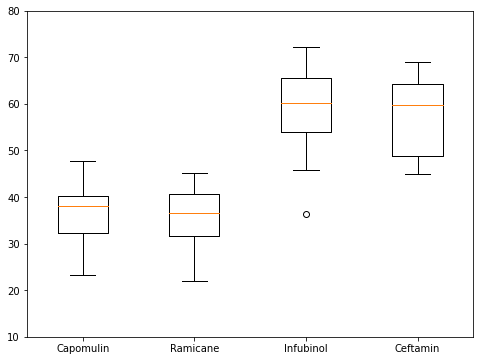

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(8,6))
plt.boxplot(final_tumor['Tumor Volume (mm3)'], labels=regimens)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

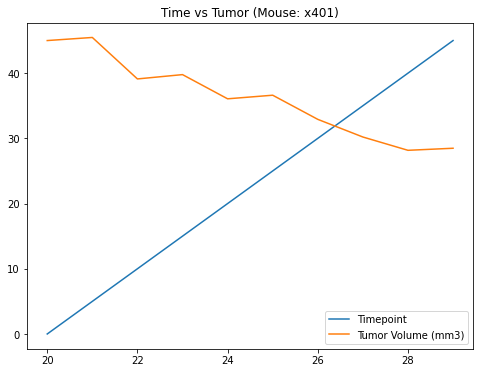

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumor_df = cleaned_df[cleaned_df["Mouse ID"] == "x401"][["Timepoint", "Tumor Volume (mm3)"]]

line_plot_df = tumor_df[["Timepoint", "Tumor Volume (mm3)"]]

lines = line_plot_df.plot.line(title="Time vs Tumor (Mouse: x401)", figsize=(8,6))

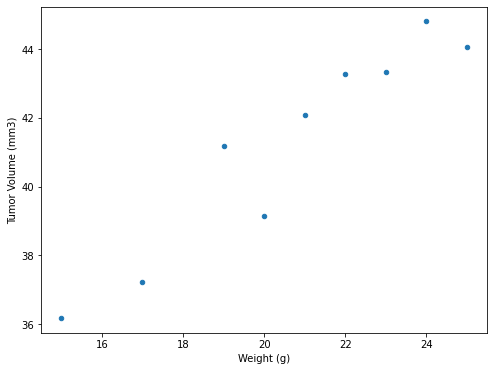

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatterdata = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"][["Weight (g)", "Tumor Volume (mm3)"]]
#scatterData = scatterData[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
#groupByData = scatterData.groupby(["Mouse ID","Weight (g)"])
scatterdata_DF = scatterdata.groupby("Weight (g)")["Tumor Volume (mm3)"].mean().reset_index()

capomulin_scatter =scatterdata_DF.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', figsize=(8,6))


## Correlation and Regression

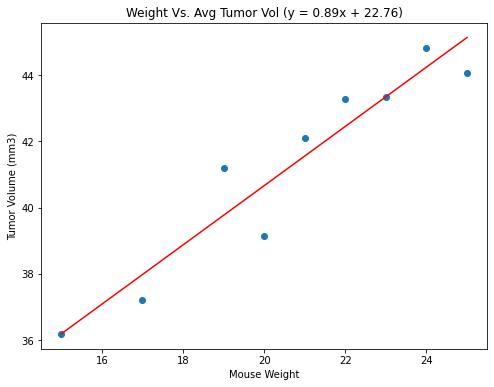

The correlation between both mouse weight and average tumor volume for Capomulin is 0.95


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = scatterdata_DF["Weight (g)"]
y_values = scatterdata_DF['Tumor Volume (mm3)']
correlation = st.pearsonr(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(8,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Weight Vs. Avg Tumor Vol ({line_eq})")
plt.show()

print(f"The correlation between both mouse weight and average tumor volume for Capomulin is {round(correlation[0],2)}")